# Project: Investigating Fandango Movie Ratings

Introduction:
- Fandango is an online movie ratings aggregator
- The purpose of project is check out if the rating system was biased and incorrect

In [1]:
import pandas as pd
import seaborn as sns
fandango=pd.read_csv("fandango_score_comparison.csv")
movie_ratings=pd.read_csv("movie_ratings_16_17.csv")

In [2]:
fandango.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [3]:
movie_ratings.head(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


In [4]:
fandango_before=fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_after=movie_ratings[["movie", "year", "fandango"]].copy()
fandango_after.head()
                                  

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Mục tiêu của project này là tìm xem liệu có sự thay đổi nào trong hệ thống đánh giá film trên website Fandango sau bài phân tích của Hickey hay không. 
Tuy nhiên, 2 nguồn data (của Hickey và của Dataquest) đều là mẫu và không ngẫu nhiên vì đều chọn mẫu theo điều kiện:

<b> Mẫu của Hickey: </b>
+ chỉ chọn data có số người dùng > 30
+ film được giảm giá vé xem phim năm 2015. 

<b> Mẫu của Dataset: </b>
+ Film được công chiếu từ năm 2016
+ Có số lượng người vote cao

Do đó, chúng ta phải thay đổi dataset hoặc thay đổi mục tiêu ban đầu. Trong giới hạn của project này, chúng ta sẽ thay đổi mục tiêu của dự án thành: Liệu có sự khác biệt nào giữa hệ thống đánh giá các film phổ biến năm 2015 và 2016 trên trang web Fandango hay không

# Changing the goals

Therefore, we need to change dataset or change our goal. Now it's hard to  find the data back in 2015, 2016 so it's better idea to choose new goal. We will check whether there is difference on rating on popular movies in 2015 and 2016 on Fandango website

# Checking the sample of dataset

In order to reach our goal, first thing we need to check is whether the sample represents the populations.
- It is popular movies (>30 voting)
- It is released on 2015 and 2016

In [6]:
#Check if the data is popular:
fandango_before.sample(10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [7]:
fandango_after.sample(10,  random_state=10)

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


As previous checking from Dataquest, the number of voting is more than 30 for all 10 movies above


In [8]:
fandango_2015=fandango_before[fandango_before["FILM"].str[-5:-1]=="2015"]
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5


In [9]:
fandango_2016=fandango_after[fandango_after["year"]==2016]
fandango_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


# Comparing votes between 2015 and 2016

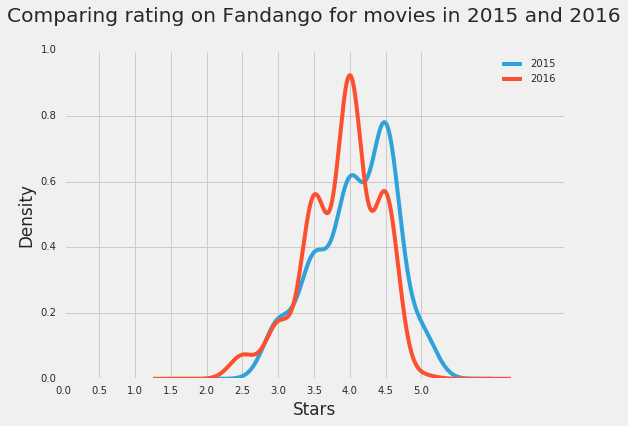

In [10]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use("fivethirtyeight")
fandango_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8, 5.5))
fandango_2016['fandango'].plot.kde(label="2016", legend=True)
plt.title("Comparing rating on Fandango for movies in 2015 and 2016", y = 1.07)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel("Stars")

For above graphs, we can see:
- The shape of both distribution is left skewed with votes with high scores
- The 2 shapes are quite the same but there is one different is that there are 3 tops in 2016
- There are change between Fandango's ratings for popular movies in 2015 and 2016 as the graph is shifted to the left or the movies in 2016 were rated lower compared to 2015


In [11]:
fandango_2015.shape

(129, 5)

In [12]:
fandango_2016.shape

(191, 3)

There is a different of number of data for both sample. In 2015 we have 129 movies, while there are 191 movies in 2016, hence using the absolute frequency table is not correct

In [14]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
fandango_2016["fandango"].value_counts(normalize=True)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

In [22]:
mean_2015=fandango_2015["Fandango_Stars"].mean()

In [32]:
mode_2015=fandango_2015["Fandango_Stars"].mode()[0]

In [33]:
median_2015=fandango_2015["Fandango_Stars"].median()

In [34]:
mean_2016=fandango_2016["fandango"].mean()

In [35]:
mode_2016=fandango_2016["fandango"].mode()[0]

In [36]:
median_2016=fandango_2016["fandango"].median()

In [37]:
summary = pd.DataFrame()
summary["2015"]=[mean_2015, mode_2015, median_2015]
summary["2016"]=[mean_2016, mode_2016, median_2016]
summary.index=["mean", "mode", "median"]
summary

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


There is just slight different between 2015 and 2016 for mod, medium and mean of rating stars

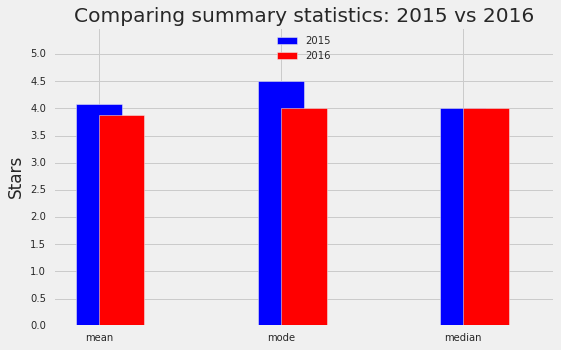

In [62]:
plt.style.use("fivethirtyeight")
summary["2015"].plot.bar(color="Blue", align="center", label="2015", width=.25)
summary["2016"].plot.bar(color="Red", width=0.25, align="edge", rot=0, figsize=(8,5))
plt.legend(loc="upper center",framealpha = 0)
plt.ylim(0,5.5)
plt.title("Comparing summary statistics: 2015 vs 2016")
plt.ylabel("Stars")
plt.yticks(arange(0,5.1,.5))
plt.show()

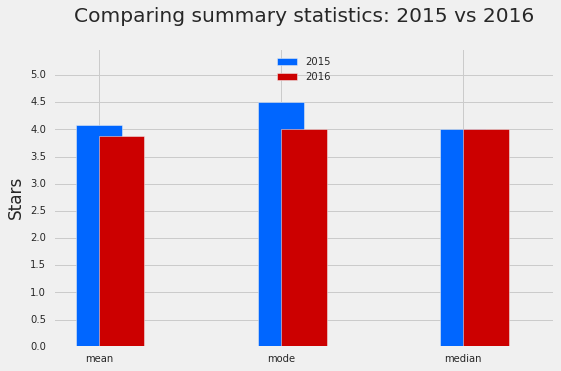

In [63]:

plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# Conclusion

Eventhough the median is same in both years, the mode and mean is slightly lower in 2016. 
The cause might be the bug in fandango's website was fixed after the blog of Hickey.